In [2]:
import scipy.io
data = scipy.io.loadmat('../../data/url.mat')

**create list for labels and data, where one entry is the data for the day with this index**

In [6]:
import numpy as np

num_of_days = 120
X, Y = [], []

for i in range(num_of_days):
    day_data = data["Day" + str(i)]
    X.append(day_data[0][0][0])
    Y.append(day_data[0][0][1])

**continous learn classifier**

In [8]:
# incremental learns classifier (must have partial_fit() function)
# returns an array of cumulative error rates for each day
def learn_incremental(clf, batch_size = 1000):
    
    error_rates = []
    num_of_days = 120
    err = 0
    cnt = 0
    for curr_day in range(num_of_days): # looping through days
    
        if (curr_day != 45):
            X_curr_day = X[curr_day]
    
            # split the data in slices of batch_size
            batches_amount = int(X_curr_day.shape[0] / batch_size)
            Y_curr_day = np.array_split(Y[curr_day], batches_amount)
    
            for j in range(batches_amount): # looping through individual urls
                select_ind = np.arange(j * batch_size, (j+1) * batch_size)
        
                X_curr_url_batch, Y_curr_url_batch = X_curr_day[select_ind,:], Y_curr_day[j] 

                # flatten y to 1d
                Y_curr_url_batch = Y_curr_url_batch.ravel()
        
                if (j > 0):
                    Y_preds = clf.predict(X_curr_url_batch)
            
                    for k in range(batch_size):
                        if(Y_preds[k] != Y_curr_url_batch[k]):
                            err = err + 1
        
                clf.partial_fit(X_curr_url_batch, Y_curr_url_batch, classes=list(range(2))) # Continous fitting of urls and label
            
            print(curr_day)
            error_rates.append(err / X_curr_day.shape[0])
            err = 0
    return error_rates

In [9]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss = 'log', alpha=0.001)

batch_size = 4000
error_rates = learn_incremental(clf, batch_size)

cnt = 0
for x in error_rates:    
    print("Error-rate Day {}   : {}".format(cnt, x))
    cnt = cnt + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
Error-rate Day 0   : 0.0263125
Error-rate Day 1   : 0.02425
Error-rate Day 2   : 0.01915
Error-rate Day 3   : 0.01865
Error-rate Day 4   : 0.02165
Error-rate Day 5   : 0.0181
Error-rate Day 6   : 0.015
Error-rate Day 7   : 0.02135
Error-rate Day 8   : 0.01955
Error-rate Day 9   : 0.0226
Error-rate Day 10   : 0.02115
Error-rate Day 11   : 0.0217
Error-rate Day 12   : 0.01995
Error-rate Day 13   : 0.0149
Error-rate Day 14   : 0.02055
Error-rate Day 15   : 0.0165
Error-rate Day 16   : 0.0169
Error-rate Day 17   : 0.0168
Error-rate Day 18   : 0.0174
Error-rate Day 19   : 0.01635
Error-rate Day 20   : 0.0196
Error-rate Day 21   : 

In [10]:
import matplotlib.pyplot as plt

def plot5degree(error_rates, batch_size, scatter = False):
    
    # Set up the day_indexes with the missing 45th day in mind
    y_indexes = np.arange(0, 120)
    y_indexes = np.delete(y_indexes, 46)
    
    y = np.array(error_rates)
    y = y * 100
    x = y_indexes

    # create polynomial equation and calculate line
    theta = np.polyfit(x, y, 5)
    y_line = theta[5] + theta[4] * pow(x, 1) + theta[3] * pow(x, 2) + theta[2] * pow(x, 3) + theta[1] * pow(x, 4) + theta[0] * pow(x, 5)

    if (scatter):
        plt.scatter(x, y)
    
    plt.plot(x, y_line, 'r')
    plt.title('LrSGD continous with batch size {}'.format(batch_size))
    plt.xlabel('Days')
    plt.ylabel('Cumulative error rate')
    plt.ylim([0,4])
    plt.show()

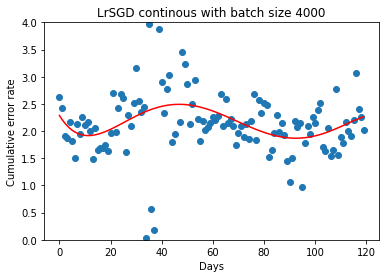

In [11]:
plot5degree(error_rates, batch_size, True)

In [15]:
import matplotlib.pyplot as plt

def plot8degree(error_rates, batch_size, scatter = False):
    
    # Set up the day_indexes with the missing 45th day in mind
    y_indexes = np.arange(0, 120)
    y_indexes = np.delete(y_indexes, 46)
    
    y = np.array(error_rates)
    y = y * 100
    x = y_indexes

    # create polynomial equation and calculate line
    theta = np.polyfit(x, y, 8)
    y_line = theta[8] + theta[7] * pow(x, 1) + theta[6] * pow(x, 2) + theta[5] * pow(x, 3) + theta[4] * pow(x, 4) + theta[3] * pow(x, 5) + theta[2] * pow(x, 6) + theta[1] * pow(x, 7) + theta[0] * pow(x, 8)

    if (scatter):
        plt.scatter(x, y, 'r')
    
    plt.plot(x, y_line, 'r')
    plt.title('LrSGD continous with batch size {}'.format(batch_size))
    plt.xlabel('Days')
    plt.ylabel('Cumulative error rate')
    plt.ylim([0,4])
    plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

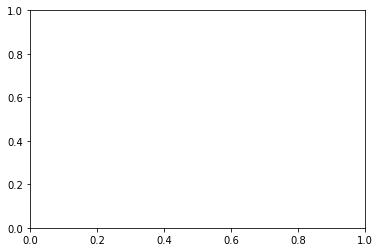

In [16]:
plot8degree(error_rates, batch_size, True)